# Testing Gravity with Einstein Rings and Velocity Dispersion

## Introduction
A quantititative way to test gravity is by using the parametrized post Newtonian framework. In the week field approximation, it is possible to characterise the space time metric with two potentials, a Newtonian potential, $\Phi$, and a curvature potential, $\Psi$ . The post Newtonian parameter shall be given by the ratio of these potentials, $\gamma_{PPN} = \Psi/\Phi$, and it should be equal one in General Relativity. We can measure $\gamma_{PPN}$ at galactic scale is by using strong gravitational lensing systems.



## The model
The first step is define the model that we are going to use in order to fit $\gamma$. There are two important measuraments that are some how related to the mass of the lens galaxy,in a Gravitational lensing systems

1. The Einstein Ring
$$ \theta_E = \left(\frac{2(1 + \gamma)GM_E}{c^2}\frac{D_{ls}}{D_sD_l} \right)$$
2. The Velocity Dispersion of the stars
$$
\frac{d[\nu(r)\sigma_r^2(r)]}{dr} + \frac{2\beta}{r}\nu(r)\sigma_r^2(r) = -\nu(r)\frac{GM(r)}{r}$$
where 
* $\nu(r) \propto r^{-\delta}$ is the brightness profile;
* $\beta = 1 - \sigma^2_t/\sigma_r^2$ is the anisotropy parameter, assumed to be constant ([a point of debate](https://arxiv.org/abs/2109.02291))
* $\sigma_r^2(r)$ is the radial componente of the velocity dispersion
* $M(r)$ is the mass profile of the lens galaxy, this is obtained through a density profile, that is generally a power law, and we goin to consider that it will be 
$$\rho(r) = \rho_0r^{-\alpha}$$
though  [this paper](https://arxiv.org/abs/2109.02291) discuss other models for the density profile.

**This is an important checkpoint** I have gave you all the information needed to solve the physical problem. Besides, I showed the origin of three parameters that shall follow us through all this analises. **Pay attention on $\delta$, $\beta$ and $\alpha$**, we can't get rid of then, even with mathematical manipulation. 

By solving these system of equation we can obtain an expression for the radial component of velocity dispersion that depends on most of the observables from the lens systems:
$$
\sigma_r^2 = \left[\frac{1}{1 + \gamma}\frac{c^2}{2}\frac{D_s}{D_{ls}}\theta_E\right]\frac{2}{\sqrt{\pi}\lambda(\alpha)(\xi - 2\beta)}\left(\frac{r}{R_E}\right)^{2 - \alpha}
$$
with $\xi = 2 - (\alpha + \delta)$. This equation describe a the velocity dispersion of stars in a 3-dimentional spherical galaxy, but unfortunately we can't observe in 3D, what we actually observe is this galaxy projected in a plane perpendicular to the line of sight, in order to do it we have to  [solve](https://arxiv.org/abs/2109.02291)
$$\sigma^2_{LOS} = \frac{1}{I(R)}\int^{\infty}_{-\infty}\nu(r)\sigma_r^2\left(1 - \frac{R^2}{r^2}\beta\right)dz$$
where $I(R) = \int^{\infty}_{-\infty}\nu(r)dz$, is the bright luminosity projected in the line of sight. **image** 

The resul is the follow equation
$$\sigma^2_{LOS} = \frac{1}{I(R)}\left[\frac{1}{1 + \gamma}\frac{c^2}{2}\frac{D_s}{D_{ls}}\theta_E\right]\frac{2}{\sqrt{\pi}\lambda(\alpha)(\xi - 2\beta)}\left(\frac{1}{R_E}\right)^{2 - \alpha}\left[B\left(\frac{\xi - 1}{2}, \frac{1}{2}\right) - \beta B\left(\frac{\xi + 1}{2}, \frac{1}{2}\right)\right]R^{1 - \xi}$$

Now we need to consider the observational conditions, for this we are going to calculate the weighted mean of $\sigma^2_{LOS}$, like in 
$$
\left \langle \sigma^2_{LOS,*} \right \rangle = 
    \frac{\int_0^{\infty} \omega(R)I(R)\sigma^2_{LOS}(R) RdR }{\int_0^{\infty} \omega(R)I(R) RdR}$$
where $ \omega(R)$ is the apperture eight function, and because we are gpoing to use data from the SDSS [we can sonsider it to be](https://arxiv.org/abs/0907.4992)
$$\omega(R) \approx e^{-R^2/2D_L^2\tilde{\sigma}^2_{atm}}$$
where $\tilde{\sigma}^2_{atm} \approx \sigma^2_{atm} [1 + (1/4)(\theta_{ap}/\sigma_{atm})^2 + (1/40)(\theta_{ap}/\sigma_{atm})^4]$, $\sigma_{atm}$ the seein and $\theta_{ap}$ the fiber aperture radius.
The result is
$$
\left \langle \sigma^2_{LOS,*} \right \rangle = \left[\frac{1}{1 + \gamma}\frac{c^2}{2}\frac{D_s}{D_{ls}}\theta_E\right] \frac{2}{\sqrt{\pi}\lambda(\alpha)(\xi - 2\beta)}
   \frac{\left [ \lambda(\xi)
   - \beta\lambda(\xi + 2) \right ]}{\lambda(\delta)}
   \left(\frac{2\tilde{\sigma}^2_{atm}}{\theta_E^2}\right)^{(2-\alpha)/2} 
   \frac{\Gamma\left ( \frac{3 - \xi}{2} \right )}{\Gamma\left ( \frac{3 - \delta}{2} \right )}
   $$
Taking the square root of this expresion we end up with an model that describe the data of the strong lens systems
$$
\bar{\sigma_*} = \sqrt{\left \langle \sigma^2_{LOS,*} \right \rangle} = \bar{\sigma_*}(\theta_E, z_l,z_s, \theta_{ap}, \sigma_{atm}, \alpha, \delta, \beta; \gamma)
$$
where $\theta_E, z_l,z_s, \theta_{ap}$ and $\sigma_{atm}$, are data from the Sloan, $\alpha, \delta$ and $\beta$ are model parameter and $\gamma$ is the post newtonian parameter that we wish to measure.

## The data
We are using the sample of 80 strong lens systems, used in [Cao2017](https://arxiv.org/abs/0907.4992). 

In [1]:
import sys

sys.path.append('../')
import rings2cosmo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from astropy import constants as const
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0 = 67.3, Om0 = 0.315)

In [2]:
data = pd.read_csv('../data/sample80.csv')
df = data.drop(["sigma_0", "dsigma_0"], axis = 1)
df.columns = ["name", "z<sub>lens</sub>", "z<sub>source</sub>", "\u03B8<sub>E</sub>", "\u03B8<sub>ap</sub>", 
              "\u03C3<sub>atm</sub>", "\u03C3<sub>SDSS</sub>","\u03B5<sub>SDSS</sub>"]
df.iloc[0:20].style

,name,zlens,zsource,θE,θap,σatm,σSDSS,εSDSS
0,J2321-0939,0.082000,0.532000,1.600000,1.500000,1.400000,249,8
1,J1106+5228,0.096000,0.407000,1.230000,1.500000,1.400000,262,13
2,J1143-0144,0.106000,0.402000,1.680000,1.500000,1.400000,269,13
3,J0841+3824,0.116000,0.657000,1.410000,1.500000,1.400000,225,11
4,J0044+0113,0.120000,0.196000,0.790000,1.500000,1.400000,266,13
5,J1213+6708,0.123000,0.640000,1.420000,1.500000,1.400000,292,15
6,J1451-0239,0.125000,0.520000,1.040000,1.500000,1.400000,223,14
7,J1218+0830,0.135000,0.717000,1.450000,1.500000,1.400000,219,11
8,J1134+6027,0.153000,0.474000,1.100000,1.500000,1.400000,239,12
9,J2303+1422,0.155000,0.517000,1.620000,1.500000,1.400000,255,16


Now that we have a model, and a data to fit in this model. Therefore we might ask **"Given the model, what is the likelihood of measure these data?"**. In math:  $P(\sigma_{SDSS}|\bar{\sigma_*})$

where $\sigma_{SDSS}$ is the measured velocity dispersion and $\bar{\sigma_*}$ is the model presented previously. Also, if you look to the table you also may find a column called $\varepsilon_{SDSS}$, this is the uncertanty in the measurament of the velocity dispersion, and we might want to consider that as well. So we can say that each $\sigma_{SDSS}$ relates to $\bar{\sigma_*}$ Galssian like, and we end up with a likelihood as
$$
P(\sigma_{SDSS}|\bar{\sigma_*}) = \frac{1}{\sqrt{2\pi\varepsilon_{SDSS}^2 }}\exp\left[-\frac{(\bar{\sigma_*} - \sigma_{SDSS})^2}{2\varepsilon_{SDSS}^2}\right]
$$

The next step is to find the free parameters, and for this we shall use Maximum Likelihood Estimation (MLE)

## Maximum Likelihood Estimation (MLE)


>"Given the model, what is the parameters that maximize the likelihood of observe this data?"



What we wnat to obtain is the maximum probability of a parameter $X$ given the data. In statiscs this probability is called the **posterior** and it is represented as
$P(X|data)$.
In order to calculate the posterior we can call on Bayes' theorem
$$P(X|data) = P(data|X)P(X)$$
where $P(data|X)$ is the likelihood, and $P(X)$ is the prior.
This is used to estimate parameters that we can't directly measure, these are  $\alpha$, $\beta$, for which we will use a gaussian prior. Then we have $\delta$ that, although we aren't going to calculate the posterior of it, I like to consider it in this group of parameters and define a flat prior. And them we have $\gamma$ that is **the one that matters the most**, since it is our final objective to measure it, its prior will also be flat, because we don't want to bias it in favor of any specific value for $\gamma$. Also we have defined our likelihood in the previous section, and now we can write our posterior as

$$P(X(\alpha,\beta;\gamma)|\{\sigma_{SDSS}\}_i) = P(\alpha)P(\beta)P(\{\sigma_{SDSS}\}_i|\bar{\sigma_*})$$
where $\{\sigma_{SDSS}\}_i$ is a group of measuraments of $\sigma_{SDSS}$ and we know that each of these measuraments are independents, therefore the likelihood of the group should is equal of the profuct of each individual likelihood
$$P(X(\alpha,\beta;\gamma)|\{\sigma_{SDSS}\}_i) = P(\alpha)P(\beta)\prod_i^n P(\sigma_{SDSS,i}|\bar{\sigma_*}) =  P(\alpha)P(\beta)\prod_i^n\left\{\frac{1}{\sqrt{2\pi\varepsilon_{SDSS,i}^2 }}\exp\left[-\frac{(\bar{\sigma_*} - \sigma_{SDSS,i})^2}{2\varepsilon_{SDSS,i}^2}\right]\right\} $$

Now we have pretty much all of what we need, we found a posterior probability function for our parameters and now to find the ones that best fits the data. In order to acomplish this we have to just maximize this expression, this means derivate and find the slope. However, do that to a product is not something easy, we can do so much better by using log, because, firstly the maximun of a function and the maximun of its log should be the same, at least for this case where we are sure that the function is well behaved, and plus, log turns products into sums. By doing that we obtain the log posterior
$$log(P(X(\alpha,\beta;\gamma)|\{\sigma_{SDSS}\}_i)) = log(P(\alpha)) + log(P(\beta)) -  \sum_i^n \left[\frac{1}{2}log(2\pi\varepsilon_{SDSS,i}^2)  + \frac{(\bar{\sigma_*} - \sigma_{SDSS,i})^2}{2\varepsilon_{SDSS,i}^2}\right]$$



In [3]:
#About the data
z_L = data['zl'].values
z_S = data['zs'].values
theta_E = (data['theta_E'].values * rings2cosmo.u.arcsec).to(rings2cosmo.u.rad).value
theta_ap = (data['theta_ap'].values * rings2cosmo.u.arcsec).to(rings2cosmo.u.rad).value
seeing_atm = (data['sigma_atm'].values * rings2cosmo.u.arcsec).to(rings2cosmo.u.rad).value
velDisp = data['sigma_ap'].values
velDispErr = data['d_sigma_ap'].values

#About the parameters value and distribution
mean_alpha = 2.0
var_alpha = 0.08
mean_beta = 0.18
var_beta = 0.13

gamma = 1.0
delta = 2.4

X_param = rings2cosmo.minimization_logprobability(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, 
                                seed = 11, alpha_ini = mean_alpha, beta_ini = mean_beta, gamma_ini = gamma, delta = delta, \
                                alpha_0_value = mean_alpha, eps_alpha_0_value = var_alpha, beta_0_value = mean_beta, eps_beta_0_value = var_beta)



/home/grasi/anaconda3/envs/workshop_ppnlens/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/grasi/anaconda3/envs/workshop_ppnlens/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [4]:
print("The parameters that maximize the probability of observing the data given the model are:\n")
print("\u03B1 = " + str(round(X_param[0], 3)))
print("\u03B2 = " + str(round(X_param[1], 3)))
print("\u03B3 = " + str(round(X_param[2], 3)))

The parameters that maximize the probability of observing the data given the model are:

α = 1.996
β = 0.18
γ = 0.996


So we got something like a best fit for the parameters in the model. But our main objective is to measure $\gamma$, and we haven't actually explore how it vary in the space of free parameters, and also, when we minimize the log likelihood for $\gamma$ we lost the information about the priors in $\beta$ and $\alpha$. What we can do about it is to integrate the posterior over the parameter space. We can do it in a range of diferent ways, but we are going to use Markov Chain Monte Carlo (MCMC).

## Markov Chain Monte Carlo (MCMC)

Monte Carlo is an integration method that uses random samples from a given probability density fuction. MCMC uses it to create Marcov Chains, wich is a sequence of sthocastic events in which the probability of event $x_{n + 1}$ occur depends only on the probability of event $x_{n}$. 
$$P(x_n+1|x_1, x_2, x_3, ..., x_n) = P(x_n+1|x_n)$$
where $P(x_n+1|x_n)$ is caled transition probability. It is given a start point and it is expected that, after a few draws most of othe number sampled shall be distributed around the peak of the density function:

<img src="Images/case2.png" alt="case1" width="500" class="center"/>

In this case we say that the chain has converged to the stationary probabilities. However, if the start point is in a region of low probabilities, it may take a while to the algorithm find the region of high density

<img src="Images/case3.png" alt="case1" width="500" class="center"/>

Because of that, generally the first points of the simulation are discarded as a burn-in.

This method is very usefull when we have a multidimentional integration problem, in our case we have a probability distribution $log(P(X(\alpha,\beta;\gamma)|\{\sigma_{SDSS}\}_i))$ that is a function with three variables $\alpha,\beta;\gamma$. To aply it to this proble we are going to use the python library [emcee](https://emcee.readthedocs.io/en/stable/). 

- The first step is define the ensamble of MarKov Chains
To do it we have to give the number of Chains `n_walkers`, the number of variables `n_dim` and the probability density function that is the log probability defined earlier.

In [5]:
import emcee
seed = 11
np.random.seed(seed)
#About the data
z_L = data['zl'].values
z_S = data['zs'].values
theta_E = (data['theta_E'].values * rings2cosmo.u.arcsec).to(rings2cosmo.u.rad).value
theta_ap = (data['theta_ap'].values * rings2cosmo.u.arcsec).to(rings2cosmo.u.rad).value
seeing_atm = (data['sigma_atm'].values * rings2cosmo.u.arcsec).to(rings2cosmo.u.rad).value
velDisp = data['sigma_ap'].values
velDispErr = data['d_sigma_ap'].values

#About the parameters value and distribution
mean_alpha = 2.0
var_alpha = 0.08
mean_beta = 0.18
var_beta = 0.13

gamma = 1.0
delta = 2.4

n_dim = 3         # number of parameters in the model 
n_walkers = 10    # number of MCMC walkers (let's start with ten walkers)


sampler = emcee.EnsembleSampler(n_walkers, n_dim, rings2cosmo.log_probability, args = (z_S, z_L, velDisp, velDispErr, theta_E, 
                                                                                 seeing_atm, theta_ap, delta, np.repeat(mean_alpha, len(z_S)), 
                                                                                 np.repeat(var_alpha, len(z_S)),np.repeat(mean_beta, len(z_S)), 
                                                                                       np.repeat(var_beta, len(z_S)), ))

- We also need to define a start point for each Chain. And why not start with the values that we obtained maximizing the likelihood and add a random fluctuation around it.

In [6]:
X0 = rings2cosmo.minimization_loglikelihood(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, seed, mean_alpha, mean_beta, gamma, delta)
X0 = X0 + 1e-5 * np.random.randn(n_walkers, n_dim)

- Let's start the first steps, that will serve as burn-in, and save the last value of the chains in a variable $X_n$

In [7]:
n_burn = 50       # "burn-in" period to let chains stabilize

Xn, prob, state = sampler.run_mcmc(X0, n_burn, progress = True)

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 117.39it/s]


- Now we can use $X_n$ as start point to generate new chains

In [8]:
n_steps = 500    # number of MCMC steps to take after burn-in
sampler.reset()
X, prob, state = sampler.run_mcmc(Xn, n_steps, rstate0 = state, progress = True)

100%|████████████████████████████████████████| 500/500 [00:03<00:00, 127.66it/s]


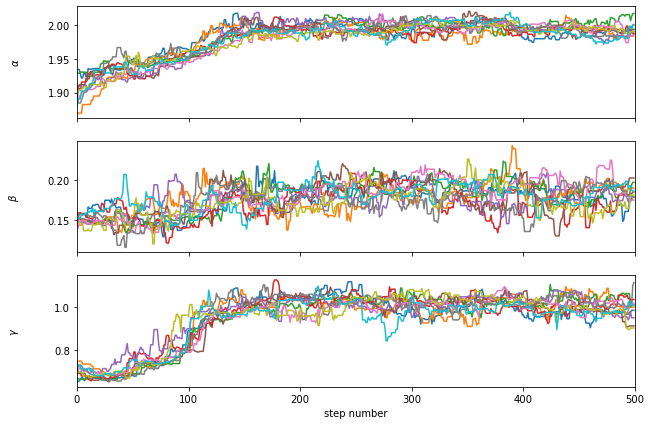

In [9]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

labels = [r"$\alpha$", r"$\beta$", r"$\gamma$"]
for i in range(3):
    ax = axes[i]
    ax.plot(samples[:, :, i])
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

It's look like it is still trying to converge to some point. Maybe a longer burning would sove it. We can also have more and longer chains in the simulation. For this we can use the optimized code. It will do exactly what we have done here but it will run in parallel, which make it faster. 

In [10]:
n_dim = 3         # number of parameters in the model 
n_walkers = 100    # number of MCMC walkers 
n_burn = 500      # "burn-in" period to let chains stabilize
n_steps = 5000    # number of MCMC steps to take after burn-in

sampler = rings2cosmo.logprobability_sampling(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, 
                            seed = 11, alpha_ini = mean_alpha, beta_ini = mean_beta, gamma_ini = gamma, delta = delta, 
                            alpha_0_value = mean_alpha, eps_alpha_0_value = var_alpha, beta_0_value = mean_beta, eps_beta_0_value = var_beta, 
                            n_dim = n_dim, n_walkers = n_walkers, n_burn = n_burn, n_steps = n_steps, progress = True, processes = 10)

Running burn-in ...


100%|█████████████████████████████████████████| 500/500 [00:14<00:00, 35.08it/s]


Sampling ...


100%|███████████████████████████████████████| 5000/5000 [02:56<00:00, 28.32it/s]


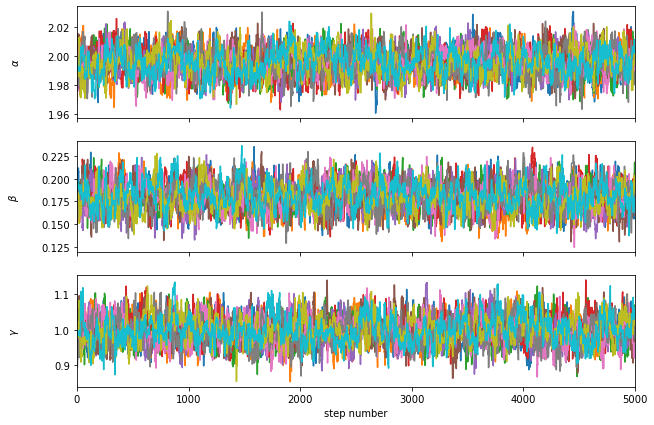

In [11]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

labels = [r"$\alpha$", r"$\beta$", r"$\gamma$"]
for i in range(3):
    ax = axes[i]
    #ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.plot(samples[:, 70:80, i])
    #ax.plot(samples[:, 80, i])
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

Now it look like it has converged. 
We can take a look in the autocorrelation time

In [14]:
sampler.get_autocorr_time()

array([36.28307834, 33.54327822, 33.65537799])

In [15]:
samples.shape 

(5000, 100, 3)

If we want to have a better look in the parameter space we can look a plot of the multivariate distribution.

In [13]:
flat_samples = sampler.get_chain(discard=1000, thin=50, flat=True)
flat_samples

array([[1.99124237, 0.20796923, 1.03774393],
       [1.99862318, 0.18345063, 0.97261668],
       [1.99577811, 0.15967358, 0.99295678],
       ...,
       [2.00816603, 0.1532447 , 1.00475522],
       [1.98805005, 0.17881028, 0.99383425],
       [2.01669283, 0.16534546, 1.01533785]])

In [16]:
flat_samples.shape

(8000, 3)

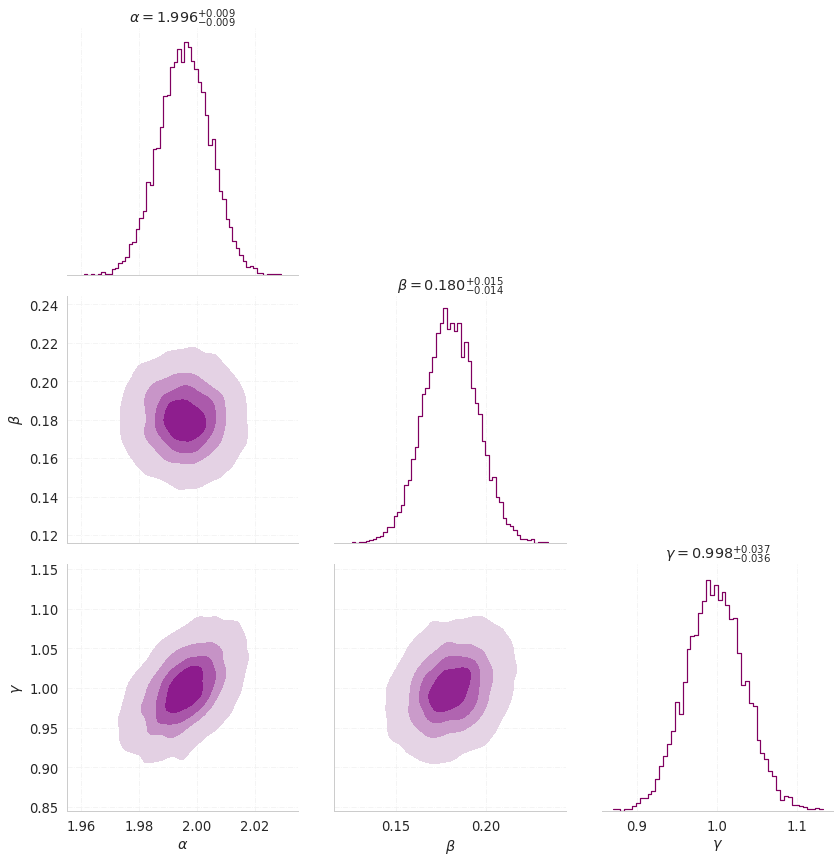

In [182]:
sns.set_style("whitegrid", { 'grid.color': '.95', 'grid.linestyle': '-.'})
sns.set_context("paper", font_scale=1.5)
g = sns.PairGrid(data = pd.DataFrame(flat_samples, columns = labels), corner = True, height = 4) #, 

g = g.map_diag(sns.histplot, element="step", fill=False, color = "#800060")
g = g.map_lower(sns.kdeplot, 
                fill = True, 
                levels=5, 
                #shade=True,
                #color = "r", cmap = "Reds" #aceitavel
                #color = '#ffcccc' 
                #cmap = "light:magenta"#
                #cmap = "light:violet"
                cmap = "light:purple"
               ) 

for i in range(len(labels)):
    percentile =  np.percentile(flat_samples[:, i], [16, 50, 84])
    diff = np.diff(percentile)
    l = labels[i][:-1]  + " = {0:.3f}^{{+{1:.3f}}}_{{-{2:.3f}}}$".format(percentile[1], diff[1], diff[0])
    g.axes[i][i].set_title(l)



We can use these result to fit a posterior for $\gamma$


In [171]:
def gaussian(x, mean, amplitude, s0):
    return amplitude * np.exp( - (x - mean)**2 /2./s0**2)

In [174]:
from scipy.optimize import curve_fit

In [172]:
g = flat_samples[:, 2]

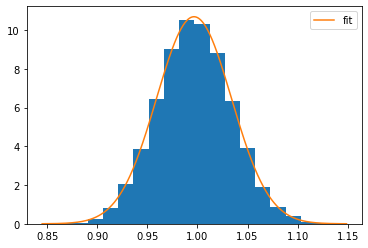

In [204]:
bin_heights, bin_borders, _ = plt.hist(g, bins=20, density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
plt.legend()
plt.show()

In [206]:
print('gamma:',popt[0])
print('sigma interval:',abs(popt[2]))

gamma: 0.9965865065315855
sigma interval: 0.03735191513820914
